# IF 1st use please run ...
```
install conda (needed)
install cuda version that complatible with pytorch see https://pytorch.org/
use Run this Command: e.g. "conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch" (given on Pytorch's website)
or "pip3 install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html" (given on Pytorch's website)
    (may be switch into env before)
git clone https://github.com/ultralytics/yolov5  # clone
cd yolov5
pip install -r requirements.txt  # install
pip install -q wandb==0.12.10

----IF Using Windows 
--> Must fixed Memory of DLL Overflow
-https://github.com/ultralytics/yolov3/issues/1643
-https://gist.github.com/cobryan05/7d1fe28dd370e110a372c4d268dcb2e5
    cobryan05 commented on 11 Oct 2021
        Download fixNvPe.py:
        https://gist.github.com/cobryan05/7d1fe28dd370e110a372c4d268dcb2e5

        Install dependency:
        python -m pip install pefile

        Run (for OPs paths) (NOTE: THIS WILL MODIFY YOUR DLLS [although it will back them up]):
        e.g. python fixNvPe.py --input C:\ProgramData\Anaconda3\lib\site-packages\torch\lib\*.dll
        e.g. python fixNvPe.py --input D:\YoloV5\venv_yolov5\Lib\site-packages\torch\lib\*.dll

-OR 
-Reduce number of worker (but affect to training speed)
- by do like this python train.py --workers 16
```

In [1]:
import torch
from IPython.display import Image  # to display images

d:\YoloV5\venv_yolov5\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
print(f"{torch.cuda.is_available()}\n{torch.cuda.device(0)}\n{torch.cuda.get_device_name(0)}")

Using torch 1.8.2+cu111 _CudaDeviceProperties(name='NVIDIA GeForce RTX 2060 SUPER', major=7, minor=5, total_memory=8192MB, multi_processor_count=34)
True
NVIDIA GeForce RTX 2060 SUPER


### Testing Yolov5 by detecting

d:\YoloV5\yolov5


detect: weights=['yolov5x6.pt'], source=data/images/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-211-gcee5959 Python-3.8.10 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)


  0%|          | 0.00/270M [00:00<?, ?B/s]
  0%|          | 144k/270M [00:00<03:19, 1.42MB/s]
  0%|          | 480k/270M [00:00<01:50, 2.56MB/s]
  1%|          | 1.69M/270M [00:00<00:39, 7.16MB/s]
  2%|▏         | 4.53M/270M [00:00<00:17, 15.9MB/s]
  3%|▎         | 7.41M/270M [00:00<00:14, 18.9MB/s]
  4%|▍         | 10.5M/270M [00:00<00:11, 23.1MB/s]
  5%|▍         | 12.7M/270M [00:00<00:14, 19.2MB/s]
  6%|▌         | 15.8M/270M [00:00<00:11, 22.6MB/s]


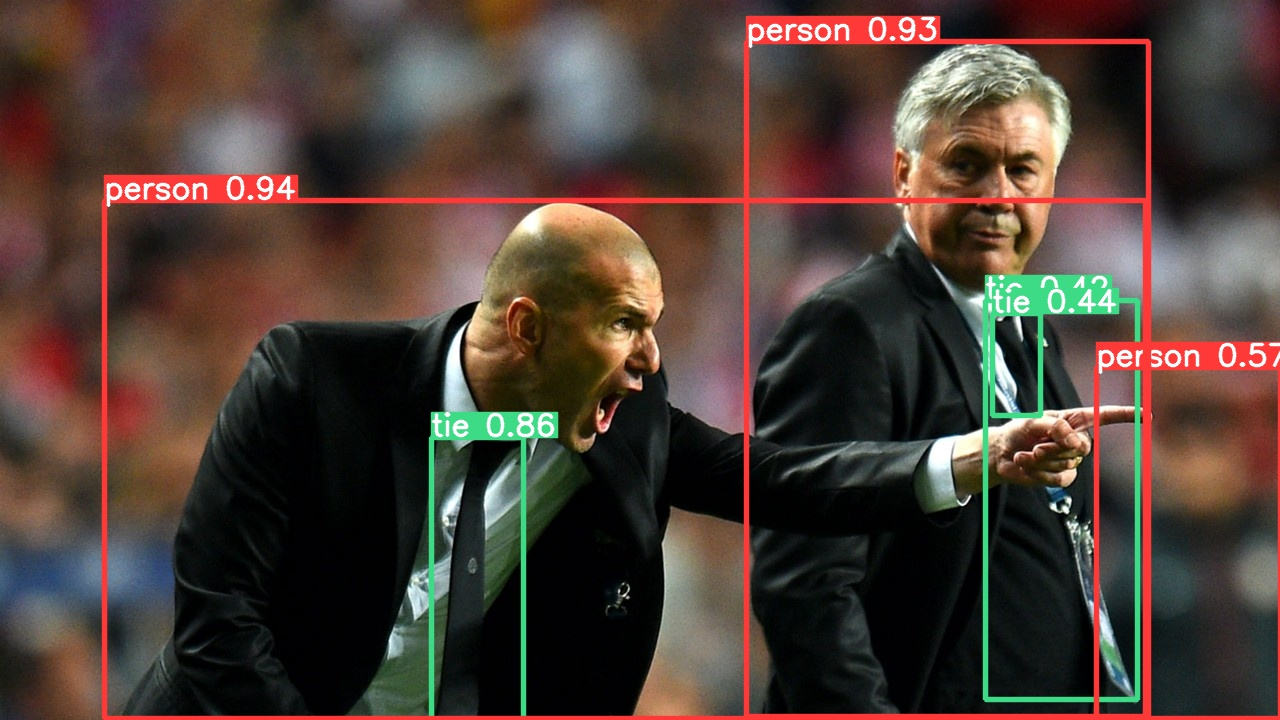

In [3]:
%cd yolov5
!python detect.py --weights yolov5x6.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

## Create yaml File for YoloV5

In [4]:
%%writefile ./med-waste-train.yaml
train: D:/DatasetMedicalWasteYolov5/data/train
val: D:/DatasetMedicalWasteYolov5/data/valid
# number of classes
nc: 41
# class names
names: ['1WayConnectorforFoley', '2WayConnectorforFoley', '2WayFoleyCatheter', '3WayConnectorforFoley', '3Waystopcock', 'AlcoholBottle', 'AlcoholPad', 'BootCover', 'CottonBall', 'CottonSwap', 'Dilator', 'DisposableInfusionSet', 'ExtensionTube', 'FaceShield', 'FrontLoadSyringe', 'GauzePad', 'Glove', 'GuideWire', 'LiquidBottle', 'Mask', 'NGTube', 'NasalCannula', 'Needle', 'OxygenMask', 'PPESuit', 'PharmaceuticalProduct', 'Pill', 'PillBottle', 'PrefilledHumidifier', 'PressureConnectingTube', 'ReusableHumidifier', 'SodiumChlorideBag', 'SterileHumidifierAdapter', 'SurgicalBlade', 'SurgicalCap', 'SurgicalSuit', 'Syringe', 'TrachealTube', 'UrineBag', 'Vaccinebottle', 'WingedInfusionSet']

Writing ./med-waste-train.yaml


## Use WanDB to be Trainning Dashboard
#### Register at https://wandb.ai/
#### and copy api_key after command
```
call wandb login [your_api_key]
```

In [5]:
!wandb login b1e738c64d3adc346a6606660ef5ce3914f425fc

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\GORN/.netrc


### Load Model from hub

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6' ) #, force_reload=True

Using cache found in C:\Users\GORN/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-21 Python-3.8.10 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.8 GFLOPs
Adding AutoShape... 


In [20]:
!python train.py --img 416 --epochs 1500 --data ./med-waste-train.yaml --cfg ./models/hub/yolov5x6.yaml --weights ./yolov5x6.pt --batch-size 64

^C
